At school teachers tend to say that linear fit (regression) is a process of drawing a line through data in a scatter plot. Yes, linear regression is simple as that but we can have multiple dimensions so instead

[1] $$y = ax + b$$ 

we can have something like this 

[2] $$y = a_{1}x_{1} + a_{2}x_{2} + ... + a_{n}x_{n} + b$$ 

if you look at any book about statistics probably you will see something like this:

$$ y_{1} = \beta_{0} + \beta_{1}x_{1}^{1} + \beta_{2}x_{2}^{1} + ... + \beta_{n}x_{n}^{1} + \epsilon_{1} $$
$$ y_{2} = \beta_{0} + \beta_{1}x_{1}^{2} + \beta_{2}x_{2}^{2} + ... + \beta_{n}x_{n}^{2} + \epsilon_{2} $$
...
$$ y_{m} = \beta_{0} + \beta_{1}x_{1}^{m} + \beta_{2}x_{2}^{m} + ... + \beta_{n}x_{n}^{m} + \epsilon_{m} $$

where n == number of features (number of dimensions) and m == number of our examples (data size)


so how can we fit (find parameters of) this equation to our data? 

Let's first write linear regression in the vectorized form (let's forget about $\epsilon$ at this moment becouse why not):


$
y = X\theta =
\left[
  \begin{array}{ccccc}
   1  & x_{1}^{1}  & x_{2}^{1} & ... & x_{n}^{1}  \\
   1  & x_{1}^{2}  & x_{2}^{2} & ... & x_{n}^{2}  \\
   ...  &  ... & ...  & ...  & ... \\
   1  & x_{1}^{m}  & x_{2}^{m} & ... & x_{n}^{m}  \\
  \end{array}
\right]
\begin{bmatrix}
           \beta_{0} \\
           \beta_{1} \\
           ... \\
           \beta_{n}
         \end{bmatrix}
$

X is (m x n+1) where m is the number of samples and n number of featues, and $\theta$ is (n+1 x 1)






In [1]:
from copy import deepcopy
from random import randint
import numpy as np

In [2]:
def linear_function(x , beta):
    return np.dot(x , beta) # you can also use X.dot(beta) as there are two implementations in numpy

now we need cost function and gradient descent or stochastic gradient descent 

or normal equation to find the parameters of linear regression

In [3]:
def cost_function(x, y, beta):
    try:
        m = len(y)
    except:
        m = 1
    J = np.sum ( (linear_function(x , beta) - y) ** 2)/(2 * m)
    return J

and now it's time for the gradient descent:

In [4]:
def gradient_descent(x, y, beta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for iteration in range(iterations):
        loss = linear_function(x , beta) - y
        gradient = np.dot(x.T, loss) / m
        beta = beta - alpha * gradient
        cost = cost_function(x, y, beta)
        cost_history[iteration] = cost    
    return beta, cost_history

we can also write SGD. We just need to shuffle the samples after each epoch and we should update weights after 
each sample:

let's use random.permutation for shuffling 

In [5]:
def shuffle(x,y):
    randp = randint(0, len(y)-1)
    return x[randp], y[randp]

In [6]:
def sgd(x, y, beta, alpha, iterations):
    m = len(y)
    cost_history_sgd = np.zeros(iterations)
    for iteration in range(iterations):
        onex, oney = shuffle(x, y)
        loss = linear_function(onex , beta) - oney
        gradient = np.dot(onex.T, loss) / m
        beta = beta - alpha * gradient
        cost = cost_function(onex, oney, beta)
        cost_history_sgd[iteration] = cost    
    return beta, cost_history_sgd

and we can also write normal equation to find the parameters of linear regression

In [7]:
def normal_equaton(x,y):
    beta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return beta

so it's time to generate some examples and check if this implementation works

let's start with something simple and move on to more dimensions 

I feel lazy today so I'll use sklearn

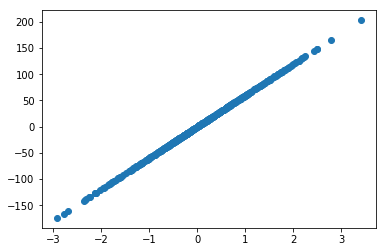

In [8]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset

m = 500 # number of examples
n = 1   # number of features (bias not counted)

x, y = make_regression(n_samples=m, n_features=n, noise=0.1)


# copy generated features and labels
x1, y1 = deepcopy(x), deepcopy(y)  # use deepcopy or x[:] , y[:]
x2, y2 = deepcopy(x), deepcopy(y)  # use deepcopy or x[:] , y[:]
x3, y3 = deepcopy(x), deepcopy(y)  # use deepcopy or x[:] , y[:]

#
min_x = min(x)
max_x = max(x)

min_y = min(y)
max_y = max(y)


# plot regression dataset
%matplotlib inline
pyplot.scatter(x,y)
pyplot.show()

In [9]:
x1 = np.insert(x1, 0, 1, axis=1)
x2 = np.insert(x2, 0, 1, axis=1)
x3 = np.insert(x3, 0, 1, axis=1)

weights (beta) initialization

In [10]:
beta = np.ones(n+1)

gradient descent parameters:

In [11]:
alpha = 0.001

In [12]:
iterations = 10000

In [13]:
beta_gd, cost_history = gradient_descent(x1, y1, beta, alpha, iterations)

In [14]:
print(beta_gd)

[2.35739844e-03 5.97319923e+01]


In [15]:
print(cost_history)

[1.73433853e+03 1.73084483e+03 1.72735818e+03 ... 5.30204396e-03
 5.30203722e-03 5.30203050e-03]


In [16]:
beta2 = np.ones(n+1)
iterations2 = 5000000

In [17]:
beta_sgd, cost_history_sgd = sgd(x2, y2, beta2, alpha, iterations2)

In [18]:
print(beta_sgd)

[2.46585230e-03 5.97317749e+01]


In [19]:
print(cost_history_sgd)

[7.04553908e+02 1.72273200e+02 6.15368937e+02 ... 1.10581500e-02
 4.39952902e-04 1.10183445e-02]


In [20]:
beta_normal = normal_equaton(x1,y1)

In [21]:
print(beta_normal)

[1.73651851e-03 5.97345146e+01]


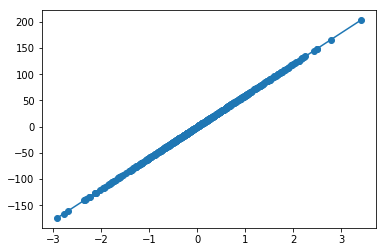

In [23]:
X_plot = np.linspace(min_x, max_x, 100)

pyplot.scatter(x,y)

pyplot.plot(X_plot, X_plot*beta_normal[1] + beta_normal[0])

pyplot.show()

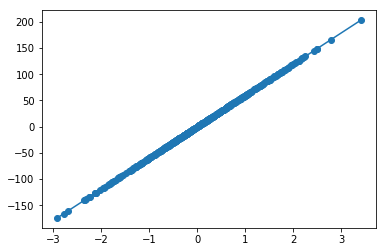

In [24]:
pyplot.scatter(x,y)

pyplot.plot(X_plot, X_plot*beta_sgd[1] + beta_sgd[0])

pyplot.show()

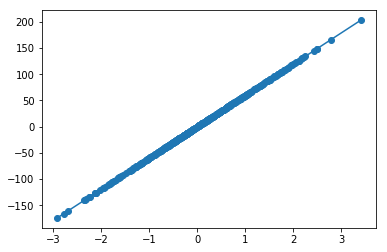

In [25]:
pyplot.scatter(x,y)

pyplot.plot(X_plot, X_plot*beta_gd[1] + beta_gd[0])

pyplot.show()

In [26]:
small_number_of_iterations = 10000
beta_sgd, cost_history_sgd = sgd(x2, y2, beta2, alpha, small_number_of_iterations)

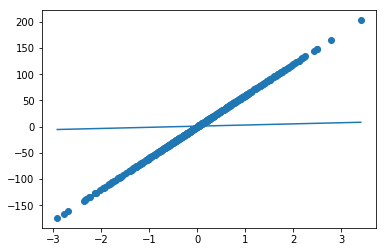

In [27]:
pyplot.scatter(x,y)

pyplot.plot(X_plot, X_plot*beta_sgd[1] + beta_sgd[0])

pyplot.show()

In [28]:
medium_number_of_iterations = 100000
beta_sgd, cost_history_sgd = sgd(x2, y2, beta2, alpha, medium_number_of_iterations)

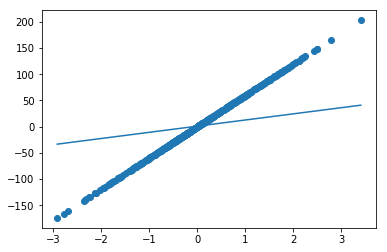

In [29]:
pyplot.scatter(x,y)

pyplot.plot(X_plot, X_plot*beta_sgd[1] + beta_sgd[0])

pyplot.show()

In [30]:
larger_number_of_iterations = 1000000
beta_sgd, cost_history_sgd = sgd(x2, y2, beta2, alpha, larger_number_of_iterations)

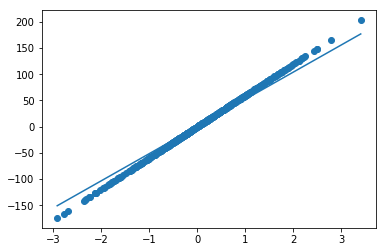

In [31]:
pyplot.scatter(x,y)

pyplot.plot(X_plot, X_plot*beta_sgd[1] + beta_sgd[0])

pyplot.show()

cool!